In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from xgboost import XGBClassifier
from xgboost import plot_importance
from numpy import mean
from numpy import std
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, classification_report
from sklearn.metrics import accuracy_score
from sklearn import metrics

from sklearn import metrics
from sklearn.metrics import RocCurveDisplay

In [2]:
data_x = pd.read_csv("x_under_cvd_death.csv")

In [3]:
data_x

,Unnamed: 0,T,delta_t,CT,prop_s,t_sys,t_dia,t_ratio,prop_delta_t,t_p1in_dia,...,Smoking status_Prefer not to answer,Smoking status_Previous,Sex_Female,Sex_Male,Ethnic background_Asian,Ethnic background_Black,Ethnic background_other including mixed,Ethnic background_white/not recorded,bp medication_0.0,bp medication_1.0
0,0,0.84857,0.14571,0.197140,0.23232,0.29143,0.55714,0.52308,0.17172,0.16286,...,0,0,0,1,0,0,0,1,1,0
1,1,0.71566,0.18795,0.180720,0.25253,0.29639,0.41928,0.70690,0.26263,0.21687,...,0,1,1,0,0,0,0,1,1,0
2,2,0.69070,0.23023,0.167440,0.24242,0.31395,0.37674,0.83333,0.33333,0.34884,...,0,1,0,1,0,0,0,1,1,0
3,3,0.78158,0.23684,0.126320,0.16162,0.32368,0.45789,0.70690,0.30303,0.21316,...,0,0,1,0,0,0,0,1,0,1
4,4,0.67500,0.26591,0.095455,0.14141,0.27955,0.39545,0.70690,0.39394,0.22500,...,0,0,1,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
931,931,1.10000,0.20000,0.266670,0.24242,0.40000,0.70000,0.57143,0.18182,0.27778,...,0,1,0,1,0,0,0,1,0,1
932,932,0.82500,0.16667,0.158330,0.19192,0.29167,0.53333,0.54688,0.20202,0.15833,...,0,0,0,1,0,0,0,1,0,1
933,933,0.80270,0.21892,0.162160,0.20202,0.33243,0.47027,0.70690,0.27273,0.19459,...,0,0,0,1,0,1,0,0,0,1
934,934,0.90000,0.17273,0.200000,0.22222,0.31818,0.58182,0.54688,0.19192,0.20000,...,0,1,0,1,0,0,0,1,1,0


In [4]:
data_x.shape

(936, 65)

In [5]:
data_crf = data_x.iloc[:, 46:65]

In [6]:
data_crf.head()

,Age when attended assessment centre,mean sbp,BMI,cholesterol HDL ratio,Diabetes diagnosed by doctor_No,Diabetes diagnosed by doctor_Prefer not to answer,Diabetes diagnosed by doctor_Yes,Smoking status_Current,Smoking status_Never,Smoking status_Prefer not to answer,Smoking status_Previous,Sex_Female,Sex_Male,Ethnic background_Asian,Ethnic background_Black,Ethnic background_other including mixed,Ethnic background_white/not recorded,bp medication_0.0,bp medication_1.0
0,63.0,128.0,25.997940,5.274432,1,0,0,0,1,0,0,0,1,0,0,0,1,1,0
1,62.0,133.0,27.323326,3.120285,1,0,0,0,0,0,1,1,0,0,0,0,1,1,0
2,57.0,134.0,25.872479,5.729126,1,0,0,0,0,0,1,0,1,0,0,0,1,1,0
3,65.0,145.0,32.356315,3.112490,1,0,0,0,1,0,0,1,0,0,0,0,1,0,1
4,46.0,134.5,27.253669,4.809663,1,0,0,0,1,0,0,1,0,0,0,0,1,1,0


In [7]:
data_omit_bp = data_crf.drop(['mean sbp', 'bp medication_0.0', 'bp medication_1.0'], axis=1)

In [8]:
data_omit_bp

,Age when attended assessment centre,BMI,cholesterol HDL ratio,Diabetes diagnosed by doctor_No,Diabetes diagnosed by doctor_Prefer not to answer,Diabetes diagnosed by doctor_Yes,Smoking status_Current,Smoking status_Never,Smoking status_Prefer not to answer,Smoking status_Previous,Sex_Female,Sex_Male,Ethnic background_Asian,Ethnic background_Black,Ethnic background_other including mixed,Ethnic background_white/not recorded
0,63.0,25.997940,5.274432,1,0,0,0,1,0,0,0,1,0,0,0,1
1,62.0,27.323326,3.120285,1,0,0,0,0,0,1,1,0,0,0,0,1
2,57.0,25.872479,5.729126,1,0,0,0,0,0,1,0,1,0,0,0,1
3,65.0,32.356315,3.112490,1,0,0,0,1,0,0,1,0,0,0,0,1
4,46.0,27.253669,4.809663,1,0,0,0,1,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
931,69.0,32.633109,4.329060,0,0,1,0,0,0,1,0,1,0,0,0,1
932,66.0,30.024032,2.552577,0,0,1,0,1,0,0,0,1,0,0,0,1
933,67.0,28.440955,1.649208,0,0,1,0,1,0,0,0,1,0,1,0,0
934,62.0,25.629780,4.558140,1,0,0,0,0,0,1,0,1,0,0,0,1


In [9]:
data_omit_bp.size

14976

In [10]:
X = data_omit_bp.values

In [11]:
X.size

14976

In [12]:
# reading the output variable

In [13]:
data_y = pd.read_csv("y_under_cvd_death.csv")

In [14]:
data_y = data_y.drop(['Unnamed: 0'], axis=1)

In [15]:
data_y

,cvd_death
0,0
1,0
2,0
3,0
4,0
...,...
931,1
932,1
933,1
934,1


In [16]:
y = data_y.values

In [17]:
y.size

936

In [18]:
# nested cv

In [19]:
cv_outer = KFold(n_splits=3, shuffle=True, random_state=42)

best_auc = []
predict_prob = []
feature_imp = []

best auc score is : 
0.7785645895412273
[[0.5279251  0.47207493]
 [0.38668793 0.61331207]
 [0.844467   0.15553302]
 [0.801034   0.19896604]
 [0.2323432  0.7676568 ]
 [0.8564023  0.14359772]
 [0.48162848 0.5183715 ]
 [0.50554717 0.49445283]
 [0.47262865 0.52737135]
 [0.82350165 0.17649837]
 [0.656285   0.343715  ]
 [0.17666876 0.82333124]
 [0.4061457  0.5938543 ]
 [0.83445287 0.16554716]
 [0.5758983  0.42410174]
 [0.60329235 0.39670762]
 [0.39666116 0.60333884]
 [0.33549237 0.6645076 ]
 [0.52451366 0.47548634]
 [0.6223594  0.3776406 ]
 [0.5733795  0.42662045]
 [0.84056085 0.15943915]
 [0.60510194 0.39489803]
 [0.58315504 0.41684496]
 [0.41252732 0.5874727 ]
 [0.60401773 0.39598227]
 [0.63461626 0.36538377]
 [0.5296542  0.4703458 ]
 [0.5201142  0.47988585]
 [0.3185959  0.6814041 ]
 [0.51426125 0.48573878]
 [0.38911426 0.61088574]
 [0.64701986 0.3529801 ]
 [0.84225947 0.15774055]
 [0.5190255  0.4809745 ]
 [0.504435   0.495565  ]
 [0.55059123 0.4494088 ]
 [0.6483635  0.35163656]
 [0.800184

best auc score is : 
0.7693004792139934
[[0.45736074 0.54263926]
 [0.50560474 0.49439526]
 [0.70449865 0.29550132]
 [0.84517854 0.15482144]
 [0.6275241  0.37247592]
 [0.3725543  0.6274457 ]
 [0.516497   0.48350295]
 [0.7572946  0.24270542]
 [0.554795   0.445205  ]
 [0.84799284 0.15200718]
 [0.433218   0.566782  ]
 [0.17575753 0.8242425 ]
 [0.41638476 0.58361524]
 [0.94939744 0.05060253]
 [0.6132692  0.38673076]
 [0.34489357 0.6551064 ]
 [0.8958485  0.10415152]
 [0.20384961 0.7961504 ]
 [0.55832934 0.4416707 ]
 [0.4513865  0.5486135 ]
 [0.42816758 0.5718324 ]
 [0.6459359  0.35406414]
 [0.42187655 0.57812345]
 [0.41648304 0.58351696]
 [0.79544896 0.20455106]
 [0.65631616 0.3436838 ]
 [0.8671252  0.13287479]
 [0.8663801  0.1336199 ]
 [0.78584427 0.21415573]
 [0.6555581  0.34444192]
 [0.4090023  0.5909977 ]
 [0.6512568  0.34874317]
 [0.81611395 0.18388605]
 [0.8276657  0.17233431]
 [0.6530298  0.34697023]
 [0.59149736 0.40850264]
 [0.70919216 0.2908078 ]
 [0.87511575 0.12488426]
 [0.601834

best auc score is : 
0.7508749385452563
[[0.6673512  0.3326488 ]
 [0.9225066  0.07749345]
 [0.45953387 0.5404661 ]
 [0.30670732 0.6932927 ]
 [0.36458397 0.63541603]
 [0.24656624 0.75343376]
 [0.39323848 0.6067615 ]
 [0.5293704  0.47062957]
 [0.37920332 0.6207967 ]
 [0.3409959  0.6590041 ]
 [0.84825695 0.15174305]
 [0.95222896 0.04777102]
 [0.35545546 0.64454454]
 [0.44742674 0.55257326]
 [0.9918953  0.0081047 ]
 [0.32976586 0.67023414]
 [0.47633713 0.52366287]
 [0.89850026 0.10149971]
 [0.26772845 0.73227155]
 [0.4291705  0.5708295 ]
 [0.9024412  0.0975588 ]
 [0.50255775 0.49744222]
 [0.65976214 0.34023783]
 [0.62538415 0.37461585]
 [0.30256063 0.6974394 ]
 [0.6942647  0.3057353 ]
 [0.86979073 0.13020928]
 [0.8999944  0.1000056 ]
 [0.4500336  0.5499664 ]
 [0.58788025 0.41211972]
 [0.3320341  0.6679659 ]
 [0.39034283 0.60965717]
 [0.5158471  0.48415294]
 [0.7832153  0.21678469]
 [0.71018755 0.28981245]
 [0.7142503  0.2857497 ]
 [0.43218106 0.56781894]
 [0.6848819  0.3151181 ]
 [0.630492

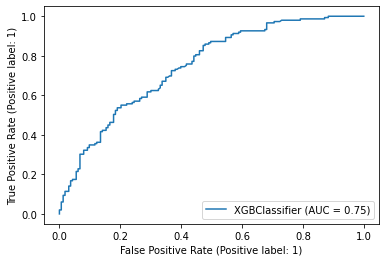

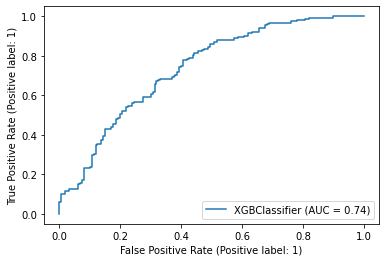

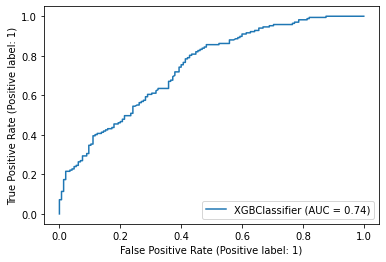

In [20]:
for train_ix, test_ix in cv_outer.split(X):
	# split data
	X_train, X_test = X[train_ix, :], X[test_ix, :]
	y_train, y_test = y[train_ix], y[test_ix]
	# configure the cross-validation procedure
	cv_inner = KFold(n_splits=3, shuffle=True, random_state=42)
	# define the model
	model = XGBClassifier(objective= 'binary:logistic', random_state=42)
	# define search space
	space = dict()
	space['n_estimators'] = [100, 250, 500, 750]
	space['max_depth'] = [3, 5, 10, 15]
	space['learning_rate'] = [0.3, 0.1, 0.01]
	space['colsample_bytree'] = [0.5, 0.8]
	# define search
	search = GridSearchCV(model, space, scoring='roc_auc', cv=cv_inner, refit=True)
	# execute search
	result = search.fit(X_train, y_train)
	roc_auc_score = result.best_score_
	print("best auc score is : ")
	print(roc_auc_score)
	best_auc.append(roc_auc_score)
	# get the best performing model fit on the whole training set
	best_model = result.best_estimator_
	# evaluate model on the hold out dataset
	yhat = best_model.predict(X_test)
	# predict proba
	y_pred_proba = best_model.predict_proba(X_test)
	print(y_pred_proba)    
	predict_prob.append(y_pred_proba)
	# evaluate the model
	acc_on_test = accuracy_score(y_test, yhat)
	print("accuracy on test data: ")
	print(acc_on_test)
	# store the result
	# cm
	cm = confusion_matrix(y_test, yhat)
	# 
	print(cm)
	# class report
	classif_report = classification_report(y_test, yhat)
	print(classif_report)
	#
	RocCurveDisplay.from_estimator(best_model, X_test, y_test)
	# feature_importances_
	f_i = best_model.feature_importances_
	print("feature importances are: ")
	print(f_i)
	feature_imp.append(f_i)
	# best parameters
	print("best parametrs: ")    
	print(result.best_params_)

In [28]:
best_auc

[0.7785645895412273, 0.7693004792139934, 0.7508749385452563]

In [29]:
round(mean(best_auc),2)

0.77

In [26]:
feature_imp

[array([0.143794  , 0.06254295, 0.03705411, 0.09480965, 0.        ,
        0.07298402, 0.09373904, 0.0902242 , 0.02471302, 0.03025682,
        0.1441482 , 0.17034364, 0.00234311, 0.00528079, 0.02109637,
        0.0066701 ], dtype=float32),
 array([0.13324234, 0.06820229, 0.05049052, 0.08733234, 0.        ,
        0.11864659, 0.11688513, 0.04318329, 0.        , 0.00952963,
        0.14169076, 0.16506095, 0.04663528, 0.        , 0.        ,
        0.01910094], dtype=float32),
 array([0.08803389, 0.05567263, 0.0575982 , 0.07874321, 0.        ,
        0.06946643, 0.09836929, 0.06909278, 0.        , 0.02576496,
        0.1815825 , 0.1966933 , 0.02166058, 0.01617926, 0.02926158,
        0.01188142], dtype=float32)]

In [23]:
df_FI_0 = pd.DataFrame(feature_imp[0], columns = ['first'])
df_FI_1 = pd.DataFrame(feature_imp[1], columns = ['second'])
df_FI_2 = pd.DataFrame(feature_imp[2], columns = ['third'])

In [24]:
df_final_FI = pd.concat([df_FI_0, df_FI_1, df_FI_2], axis = 1)

In [25]:
df_final_FI

,first,second,third
0,0.143794,0.133242,0.088034
1,0.062543,0.068202,0.055673
2,0.037054,0.050491,0.057598
3,0.094810,0.087332,0.078743
4,0.000000,0.000000,0.000000
5,0.072984,0.118647,0.069466
6,0.093739,0.116885,0.098369
7,0.090224,0.043183,0.069093
8,0.024713,0.000000,0.000000
9,0.030257,0.009530,0.025765


In [27]:
df_final_FI.to_csv("FI_values_cvd_death_crf_omitting_bp.csv")

In [31]:
# pred prob

In [32]:
len(predict_prob)

3

In [33]:
df_predict_0 = pd.DataFrame(predict_prob[0], columns = ['first_0','first_1'])
df_predict_1 = pd.DataFrame(predict_prob[1], columns = ['second_0','second_1'])
df_predict_2 = pd.DataFrame(predict_prob[2], columns = ['third_0','third_1'])

In [34]:
df_final_pred = pd.concat([df_predict_0, df_predict_1, df_predict_2], axis = 1)

In [35]:
df_final_pred

,first_0,first_1,second_0,second_1,third_0,third_1
0,0.527925,0.472075,0.457361,0.542639,0.667351,0.332649
1,0.386688,0.613312,0.505605,0.494395,0.922507,0.077493
2,0.844467,0.155533,0.704499,0.295501,0.459534,0.540466
3,0.801034,0.198966,0.845179,0.154821,0.306707,0.693293
4,0.232343,0.767657,0.627524,0.372476,0.364584,0.635416
...,...,...,...,...,...,...
307,0.665094,0.334906,0.338025,0.661975,0.773031,0.226969
308,0.348636,0.651364,0.169234,0.830766,0.329402,0.670598
309,0.239599,0.760401,0.804107,0.195893,0.518542,0.481458
310,0.124665,0.875335,0.289833,0.710167,0.264805,0.735195


In [36]:
df_final_pred.to_csv("prob_values_cvd_death_crf_omitting_bp.csv")

In [37]:
# sensitivity and specificity

In [38]:
# sensitivity for class '0' which is also specificity

In [39]:
sensitivity_class_zero = [0.63, 0.67, 0.64]

In [41]:
print("sensitivity of class zero: ", round(mean(sensitivity_class_zero),2))

sensitivity of class zero:  0.65


In [42]:
# sensitivity for class one

In [43]:
sensitivity_class_one = [0.71, 0.68, 0.66]

In [44]:
print("sensitivity of class one: ", round(mean(sensitivity_class_one),2))

sensitivity of class one:  0.68


In [1]:
# Getting AUC from outer loop, average over 3 folds

In [3]:
auc_outer_loop = [0.75, 0.74, 0.74]

In [4]:
auc_outer_loop_mean = round(mean(auc_outer_loop),2)

In [5]:
print(auc_outer_loop_mean)

0.74
